#Invocación a librerías

In [1]:
import sys
import os
# generar imagenes o alterar
from keras.preprocessing.image import ImageDataGenerator
# optimizar
from keras import optimizers
# permite definir el objeto o red convolucional
from keras.models import Sequential
# capa densa de neuronas
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers import Convolution2D, MaxPooling2D
from keras import backend as K

#Limpiar memoria de sesion

In [ ]:
K.clear_session()

#Proporcionar ruta de datos de entrenamiento y validación en el drive

In [2]:
data_entrenamiento = '../Indexados'
data_test = '../indexPrueba'

#Pre Procesado

In [10]:

entrenamiento_datagen = ImageDataGenerator(
	rescale = 1./255,        # Reescalamiento: Normalización de datos
	shear_range = 0.3,       # inclina la imagen
	zoom_range = 0.3,        # Aplica zoom (acercamiento de imagen)
	horizontal_flip = True   # Invierte la imagen
)

validacion_datagen = ImageDataGenerator(
	rescale = 1./255 # Reescalamiento: Normalización de datos, no es necesario otras operaciones
)

imagen_entrenamiento = entrenamiento_datagen.flow_from_directory(
	data_entrenamiento,          # accede a la carpeta de entrenamiento
	target_size = (128, 128),    # Redefine el tamaño a 128x128
	batch_size = 32,             # El tamaño de lote es 32, es decir trabaja en bloques de 32
	class_mode = 'categorical'   # la clasificación es categorica
)

imagen_validacion = validacion_datagen.flow_from_directory(
	data_test,                   # accede a la carpeta de entrenamiento
	target_size=(128,128),       # Redefine el tamaño a 128x128
	batch_size=32,               # El tamaño de lote es 32, es decir trabaja en bloques de 32
	class_mode='categorical'     # la clasificación es categorica
)

Found 26636 images belonging to 2 classes.
Found 6658 images belonging to 2 classes.


# Creación de modelo CNN

## V1 CNN NORMAL

In [ ]:
# Creación de objeto CNN como un modelo secuencial
cnn = Sequential()
# capa 1: Convolución de 32 filtros de 3x3, función de activación RELU
# Imagenes de entrada 100x100 con 3 canales

#cnn.add(Convolution2D(32, (3,3), padding='same', input_shape=(100, 100,3), activation='relu'))
cnn.add(Convolution2D(32, (3,3), padding='same', input_shape=(224, 224,3), activation='relu'))

# Capa 2: MaxPoling 2x2
cnn.add(MaxPooling2D(pool_size=(2,2)))

# Capa 3: Convolución de 64 filtros de 2x2, función activación RELU
cnn.add(Convolution2D(64, (2,2), padding='same', activation='relu'))

# Capa 4: MaxPoling 2x2
cnn.add(MaxPooling2D(pool_size=(2,2)))

# Capa 5: Convolución de 128 filtros de 3x3, función activación RELU
cnn.add(Convolution2D(128, (3,3), padding='same', activation='relu'))

# Capa 6: MaxPoling 2x2
cnn.add(MaxPooling2D(pool_size=(2,2)))
# Capa 7: Aplanado de datos
cnn.add(Flatten())

# Capa 8: Red densa de 512 neurona, función de activación RELU
cnn.add(Dense(512, activation='relu'))

# Capa 9: Red densa de 256 neurona, función de activación RELU
cnn.add(Dense(256, activation='relu'))

# Capa 10: Red densa de 64 neurona, función de activación RELU
cnn.add(Dense(64, activation='relu'))

# Capa 11: Capa densa de 3 neuronas, función de activación SOFTMAX
cnn.add(Dense(2, activation='softmax'))

In [ ]:
cnn.summary()

#Compilación del modelo

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Entrenamiento del modelo

In [ ]:
# Entrenar con:
# Número de veces a procesar en cada epoca = 25
# Epocas =10
# Número de veces a procesar la validación en cada epoca = 20
cnn.fit(imagen_entrenamiento, steps_per_epoch=200, epochs=7, validation_data=imagen_validacion, validation_steps=20)

## V2 VGG NET

In [11]:
cnn = Sequential()
cnn.add(Convolution2D(64, padding="same", input_shape=(128,128,3), kernel_size=(3,3),activation="relu"))
cnn.add(Convolution2D(64, kernel_size=(3,3), padding="same", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
cnn.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cnn.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
cnn.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
cnn.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
cnn.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

In [12]:
cnn.add(Flatten())
cnn.add(Dense(units=4096,activation="relu"))
cnn.add(Dense(units=4096,activation="relu"))
cnn.add(Dense(units=2, activation="softmax"))

In [13]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                  

In [15]:
cnn.fit(imagen_entrenamiento, steps_per_epoch=100, epochs=8, validation_data=imagen_validacion, validation_steps=100)

Epoch 1/8
100/100 [==============================] - 57s 539ms/step - loss: 0.8786 - accuracy: 0.5208 - val_loss: 0.6929 - val_accuracy: 0.5156
Epoch 2/8
100/100 [==============================] - 53s 527ms/step - loss: 0.6930 - accuracy: 0.5166 - val_loss: 0.6930 - val_accuracy: 0.5113
Epoch 3/8
100/100 [==============================] - 55s 551ms/step - loss: 0.6924 - accuracy: 0.5222 - val_loss: 0.6933 - val_accuracy: 0.5119
Epoch 4/8
100/100 [==============================] - 54s 545ms/step - loss: 0.7257 - accuracy: 0.5041 - val_loss: 0.6928 - val_accuracy: 0.5153
Epoch 5/8
100/100 [==============================] - 56s 564ms/step - loss: 0.6928 - accuracy: 0.5219 - val_loss: 0.6924 - val_accuracy: 0.5234
Epoch 6/8
100/100 [==============================] - 54s 544ms/step - loss: 0.6918 - accuracy: 0.5312 - val_loss: 0.6929 - val_accuracy: 0.5138
Epoch 7/8
100/100 [==============================] - 53s 525ms/step - loss: 0.6929 - accuracy: 0.5160 - val_loss: 0.6930 - val_accuracy:

# Métrica

In [ ]:
score = cnn.evaluate(imagen_validacion)
print("Exactitud test:", score[1])

#PREDICCIÓN

#Carga de librerías

In [16]:
import numpy as np
import sys
import os
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt

#Predicción de r-18 imágenes

In [19]:
def Prediccion(ArchivoImagen):
	img = tf.keras.preprocessing.image.load_img(ArchivoImagen,target_size=(128,128))
	img = np.asarray(img)
	plt.imshow(img)
	img = np.expand_dims(img,axis=0)
	arreglo = cnn.predict(img)
	resultado=arreglo[0]
	respuesta=np.argmax(resultado)
	if respuesta==0:
		print('r-18')
	elif respuesta==1:
		print('safe')

#Predicción

1/1 [==============================] - 1s 657ms/step
r-18


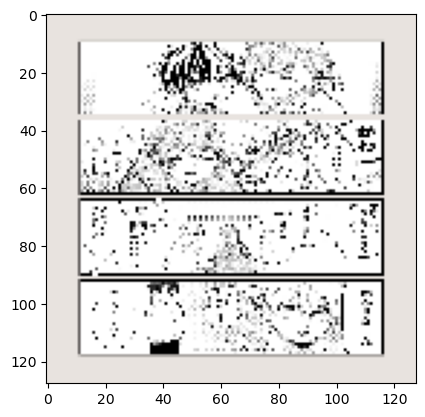

In [20]:
Prediccion('../109238943_p0.jpg')

1/1 [==============================] - 0s 20ms/step
r-18


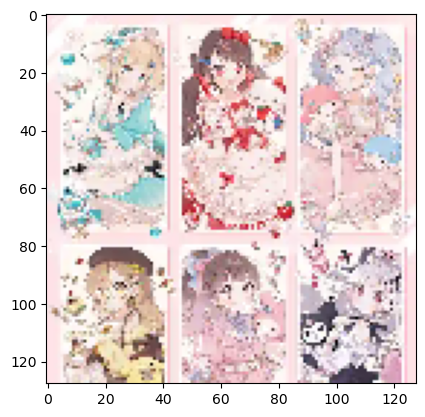

In [21]:
Prediccion('../109223786_p0_square1200.jpg')

1/1 [==============================] - 0s 22ms/step
r-18


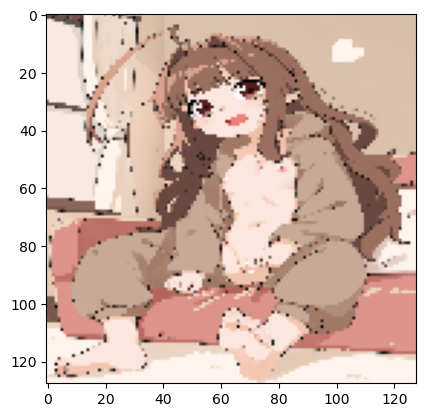

In [22]:
Prediccion('../test1.png')

1/1 [==============================] - 0s 20ms/step
r-18


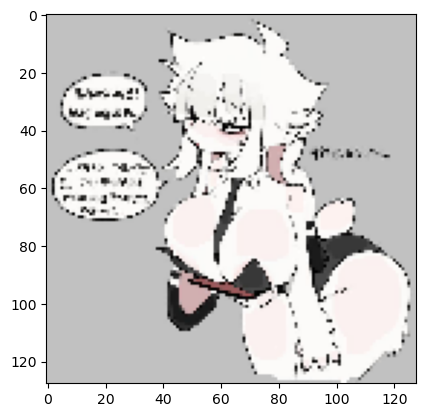

In [27]:
Prediccion('../test2.jpg')

1/1 [==============================] - 0s 22ms/step
r-18


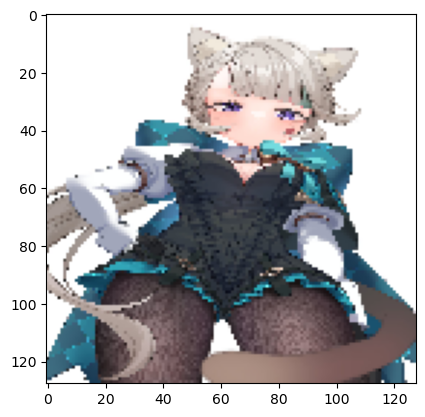

In [26]:
Prediccion('../test3.jpg')

1/1 [==============================] - 0s 19ms/step
r-18


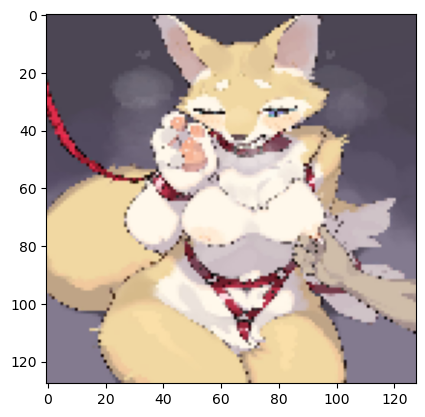

In [25]:
Prediccion('../test4.jpg')

1/1 [==============================] - 0s 18ms/step
r-18


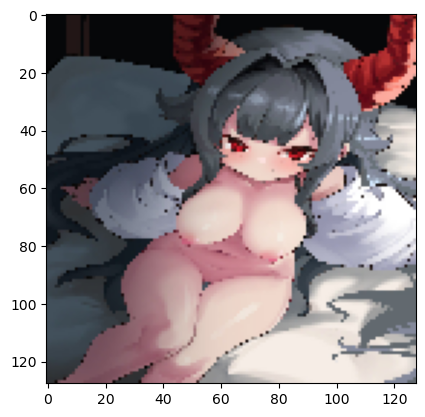

In [24]:
Prediccion('../test5.jpg')

1/1 [==============================] - 0s 18ms/step
r-18


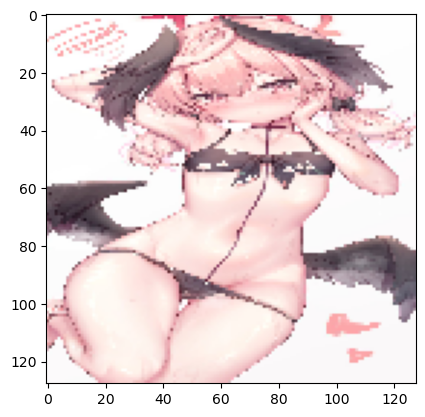

In [23]:
Prediccion('../test6.jpg')